## **Project 2: Used Cars Dataset - Exploratory Data Analysis**
 _Authors: Lisha Ramon, Safal Thapa, Saar Turjeman_

 The prediction of used cars prices using supervised learning on Python



## Introduction

This dataset, sourced from Kaggle, includes details about used cars sold across the U.S., such as price, year, make, model, mileage, color, and other specifications. The goal of this analysis is to explore how these features relate to car prices.

We plan to predict good car deals based on factors like mileage, days on market, and savings amount. To do this, we’ll build a linear regression model using scikit-learn, which will help us understand the relationship between these features and the car's price. In addition, we built a logistic regression model that predicts if a used car is a good deal or not based on cumlative score from three different scores.


## Dataset Overview

The dataset includes a snippet of the following features:
(From existing 66 columns)

- **price**: The listed price of the car.
- **year**: The year the car was manufactured.
- **make**: The manufacturer of the car.
- **model**: The specific model of the car.
- **mileage**: The number of miles the car has been driven.
- **color**: The exterior color of the car.
- **state**: The U.S. state where the car is listed.
- **vin**: The vehicle identification number.


## Lisha

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score, auc, precision_score, classification_report



%matplotlib inline

RANDOM_STATE=42

plt.style.use('ggplot')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 66)
pd.set_option('display.width', 1000)

# Loading data and initial exploration

In [7]:
df = pd.read_csv('used_cars_data.csv', nrows=30000, low_memory=False)

In [8]:
df.head()

vin back_legroom  bed bed_height bed_length        body_type cabin      city  city_fuel_economy  combine_fuel_economy  daysonmarket  dealer_zip                                        description engine_cylinders  engine_displacement engine_type exterior_color  fleet frame_damaged  franchise_dealer franchise_make front_legroom fuel_tank_volume fuel_type has_accidents   height  highway_fuel_economy  horsepower            interior_color  isCab  is_certified is_cpo  is_new is_oemcpo  latitude    length listed_date listing_color  listing_id  longitude                                   main_picture_url                                      major_options   make_name maximum_seating  mileage       model_name  owner_count               power    price salvage  savings_amount  seller_rating   sp_id              sp_name theft_title                 torque transmission         transmission_display  trimId     trim_name  vehicle_damage_category wheel_system wheel_system_display  \
0  ZACNJABB5KPJ92081      35.1 in  NaN        NaN        NaN  SUV / Crossover   NaN   Bayamon                NaN                   NaN           522         960  [!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...               I4               1300.0          I4   Solar Yellow    NaN           NaN              True           Jeep       41.2 in         12.7 gal  Gasoline           NaN  66.5 in                   NaN       177.0                     Black    NaN           NaN    NaN    True       NaN   18.3988  166.6 in  2019-04-06        YELLOW   237132766   -66.1582  https://static.cargurus.com/images/forsale/202...                            ['Quick Order Package']        Jeep         5 seats      7.0         Renegade          NaN  177 hp @ 5,750 RPM  23141.0     NaN               0            2.8  370599    Flagship Chrysler         NaN  200 lb-ft @ 1,750 RPM            A  9-Speed Automatic Overdrive  t83804  Latitude FWD                      NaN          FWD    Front-Wheel Drive   
1  SALCJ2FX1LH858117      38.1 in  NaN        NaN        NaN  SUV / Crossover   NaN  San Juan                NaN                   NaN           207         922  [!@@Additional Info@@!]Keyless Entry,Ebony Mor...               I4               2000.0          I4   Narvik Black    NaN           NaN              True     Land Rover       39.1 in         17.7 gal  Gasoline           NaN    68 in                   NaN       246.0             Black (Ebony)    NaN           NaN    NaN    True       NaN   18.4439    181 in  2020-02-15         BLACK   265946296   -66.0785  https://static.cargurus.com/images/forsale/202...                        ['Adaptive Cruise Control']  Land Rover         7 seats      8.0  Discovery Sport          NaN  246 hp @ 5,500 RPM  46500.0     NaN               0            3.0  389227  Land Rover San Juan         NaN  269 lb-ft @ 1,400 RPM            A  9-Speed Automatic Overdrive  t86759         S AWD                      NaN          AWD      All-Wheel Drive   
2  JF1VA2M67G9829723      35.4 in  NaN        NaN        NaN            Sedan   NaN  Guaynabo               17.0                   NaN          1233         969                                                NaN               H4               2500.0          H4            NaN  False         False              True           FIAT       43.3 in         15.9 gal  Gasoline         False  58.1 in                  23.0       305.0                       NaN  False           NaN    NaN   False       NaN   18.3467  180.9 in  2017-04-25       UNKNOWN   173473508   -66.1098                                                NaN  ['Alloy Wheels', 'Bluetooth', 'Backup Camera',...      Subaru         5 seats      NaN          WRX STI          3.0  305 hp @ 6,000 RPM  46995.0   False               0            NaN  370467     FIAT de San Juan       False  290 lb-ft @ 4,000 RPM            M               6-Speed Manual  t58994          Base                      NaN          AWD      All-Wheel Drive   
3  SALRR2RV0L2433391      37.

## Splitting the dataset into Training and Testing Sets
(0.8 : 0.2 ratio):

The dataset (`df`) is split into two parts: training (`df_train`) and testing (`df_test`) sets.

- **Test Size**: 20% of the data is allocated to the testing set
- **Random State**: Keeps the split consistent every time by using a fixed random seed

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

In [11]:
## Inspecting the Training Data

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 21753 to 23654
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      24000 non-null  object 
 1   back_legroom             22750 non-null  object 
 2   bed                      203 non-null    object 
 3   bed_height               1457 non-null   object 
 4   bed_length               1457 non-null   object 
 5   body_type                23892 non-null  object 
 6   cabin                    242 non-null    object 
 7   city                     24000 non-null  object 
 8   city_fuel_economy        20507 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             24000 non-null  int64  
 11  dealer_zip               24000 non-null  int64  
 12  description              23235 non-null  object 
 13  engine_cylinders         23305 non-null  object 
 14  engine_displacement    

In [13]:
# Counting Missing Values in the 'maximum_seating' Column
sum(df_train['maximum_seating'].isnull())

1250

In [14]:
# Checking Distinct Categories in the 'transmission' Column
df_train['transmission'].unique()

array(['A', 'CVT', 'M', nan, 'Dual Clutch'], dtype=object)

In [15]:
# Provides dimensions of data
df_train.shape

(24000, 66)

In [16]:
# Selects only numeric columns
df_train.select_dtypes('number')

city_fuel_economy  combine_fuel_economy  daysonmarket  dealer_zip  engine_displacement  highway_fuel_economy  horsepower  is_certified  latitude  listing_id  longitude   mileage  owner_count    price  savings_amount  seller_rating   sp_id  vehicle_damage_category  year
21753               20.0                   NaN           195       11581               3500.0                  27.0       295.0           NaN   40.6635   267004488   -73.7145       NaN          NaN  37719.0               0       3.111111   54565                      NaN  2020
251                 12.0                   NaN            25       11797               4400.0                  17.0       555.0           NaN   40.8168   279405543   -73.4643   74046.0          NaN  25495.0            1926       2.963636  432605                      NaN  2013
22941               17.0                   NaN            41        7644               3000.0                  23.0       340.0           NaN   40.8807   277879889   -74.0801   60992.0          1.0  38200.0            1591       4.250000  341550                      NaN  2014
618                  NaN                   NaN             1        7643               2000.0                   NaN       160.0           NaN   40.8558   281577754   -74.0493  142715.0          3.0   4499.0            1336       3.577778  351457                      NaN  2012
17090               16.0                   NaN           172        6405               5300.0                  22.0       355.0           NaN   41.2772   269203901   -72.8566   33611.0          1.0  36499.0            3302       4.285714  343421                      NaN  2017
...                  ...                   ...           ...         ...                  ...                   ...         ...           ...       ...         ...        ...       ...          ...      ...             ...            ...     ...                      ...   ...
29802                NaN                   NaN            14        7652               1600.0                   NaN       181.0           NaN   40.9721   280363300   -74.0805   34023.0          2.0  14980.0            1022       4.347826   64256                      NaN  2014
5390                27.0                   NaN            14       48207               1000.0                  29.0       123.0           NaN   42.3361   280328210   -83.0289       0.0          NaN  27361.0               0       4.500000   56374                      NaN  2020
860                 27.0                   NaN             3       11716               2000.0                  31.0       146.0           NaN   40.7589   281509942   -73.1055       2.0          NaN  25145.0               0       3.647059  339626                      NaN  2021
15795               23.0                   NaN           246        8876               2000.0                  31.0       280.0           NaN   40.5801   262552399   -74.6018      18.0          NaN  52140.0               0       4.555556  337771                      NaN  2020
23654               21.0                   NaN             1        7446               3500.0                  30.0       268.0           NaN   41.0584   281559666   -74.1416   29389.0          1.0  28495.0             518       4.078947  274050                      NaN  2017

[24000 rows x 19 columns]

In [17]:
# Generates summary statistics of numberic columns
df_train.describe(include='number')

city_fuel_economy  combine_fuel_economy  daysonmarket    dealer_zip  engine_displacement  highway_fuel_economy    horsepower  is_certified      latitude    listing_id     longitude        mileage   owner_count         price  savings_amount  seller_rating          sp_id  vehicle_damage_category          year
count       20507.000000                   0.0  24000.000000  24000.000000         22638.000000          20507.000000  22638.000000           0.0  24000.000000  2.400000e+04  24000.000000   23169.000000  13860.000000  2.400000e+04    24000.000000   23791.000000   24000.000000                      0.0  24000.000000
mean           22.075633                   NaN     77.699458  15974.008917          2785.961657             29.112303    244.965810           NaN     41.104617  2.752503e+08    -75.552831   33674.825974      1.484055  2.967181e+04      812.392542       4.018940  252558.736292                      NaN   2017.328792
std             7.270691                   NaN    108.817385  15510.562040          1090.245955              6.743327     85.125898           NaN      1.554168  8.849828e+06      3.854653   45078.683178      0.854671  2.262667e+04     1377.769738       0.595680  125391.999454                      NaN      4.016864
min            10.000000                   NaN      0.000000    922.000000           700.000000             13.000000     78.000000           NaN     18.346700  9.873062e+07   -118.449000       0.000000      1.000000  8.990000e+02        0.000000       1.000000   49813.000000                      NaN   1940.000000
25%            18.000000                   NaN     15.000000   7202.000000          2000.000000             25.000000    180.000000           NaN     40.721800  2.746167e+08    -74.584800       7.000000      1.000000  1.759000e+04        0.000000       3.527778  156550.000000                      NaN   2017.000000
50%            21.000000                   NaN     36.000000   8876.000000          2500.000000             28.000000    241.000000           NaN     40.869400  2.784062e+08    -74.080500   20025.000000      1.000000  2.613550e+04       87.000000       4.142857  282642.000000                      NaN   2018.000000
75%            24.000000                   NaN     81.000000  11746.000000          3500.000000             33.000000    295.000000           NaN     41.566800  2.802684e+08    -73.528600   44923.000000      2.000000  3.734075e+04     1211.000000       4.555556  342815.000000                      NaN   2020.000000
max           127.000000                   NaN   2150.000000  91401.000000          8400.000000            122.000000    808.000000           NaN     43.037200  2.816701e+08    -66.078500  341893.000000     10.000000  1.390000e+06    32718.000000       5.000000  439840.000000                      NaN   2021.000000

In [18]:
# Getting all object columns
df_train.select_dtypes('object')

vin back_legroom  bed bed_height bed_length        body_type cabin           city                                        description      engine_cylinders           engine_type           exterior_color  fleet frame_damaged franchise_make front_legroom fuel_tank_volume          fuel_type has_accidents   height                interior_color  isCab is_cpo is_oemcpo    length listed_date listing_color                                   main_picture_url                                      major_options   make_name maximum_seating   model_name               power salvage                               sp_name theft_title                 torque transmission transmission_display  trimId      trim_name wheel_system wheel_system_display wheelbase    width
21753  5TDBZRBH9LS507308        41 in  NaN        NaN        NaN  SUV / Crossover   NaN  Valley Stream  Black 2020 Toyota Highlander LE AWD 8-Speed Au...                    V6                    V6                    Black    NaN           NaN         Toyota       40.4 in         17.9 gal           Gasoline           NaN  68.1 in  Black (Ash Fabric Seat Trim)    NaN    NaN       NaN  194.9 in  2020-02-27         BLACK                                                NaN  ['Alloy Wheels', 'Third Row Seating', 'Backup ...      Toyota         8 seats   Highlander  295 hp @ 6,600 RPM     NaN                      Advantage Toyota         NaN  263 lb-ft @ 4,700 RPM            A    8-Speed Automatic  t90133         LE AWD          AWD      All-Wheel Drive  112.2 in    76 in
251    5YMGZ0C53DLL29847      35.9 in  NaN        NaN        NaN  SUV / Crossover   NaN       Woodbury  [!@@Additional Info@@!]ABS,4-Wheel Disc Brakes...                    V8                    V8  Black Sapphire Metallic  False         False            NaN       40.4 in         22.5 gal           Gasoline         False  66.3 in                         Black  False    NaN       NaN    192 in  2020-08-15         BLACK  https://static.cargurus.com/images/forsale/202...  ['Leather Seats', 'Sunroof/Moonroof', 'Navigat...         BMW         4 seats         X6 M  555 hp @ 6,000 RPM   False                     Dream Car Gallery       False  500 lb-ft @ 1,500 RPM            A            Automatic  t43764            AWD          AWD      All-Wheel Drive  115.5 in  86.4 in
22941  SALGS2WFXEA149154      35.5 in  NaN        NaN        NaN  SUV / Crossover   NaN           Lodi  2014 Range Rover HSE with incredibly low miles...                    V6                    V6                    Black  False         False            NaN       38.9 in           28 gal           Gasoline          True  72.3 in                         Black  False    NaN       NaN  196.8 in  2020-07-30         BLACK  https://static.cargurus.com/images/forsale/202...  ['Leather Seats', 'Sunroof/Moonroof', 'Navigat...  Land Rover         5 seats  Range Rover  340 hp @ 6,500 RPM   False                Vantage Auto Wholesale       False  332 lb-ft @ 3,500 RPM            A    8-Speed Automatic  t50014            HSE          4WD     Four-Wheel Drive    115 in  87.4 in
618    1FAHP3M21CL363282      33.2 in  NaN        NaN        NaN        Hatchback   NaN   Little Ferry  [!@@Additional Info@@!]Door Handle Color - Bod...                    I4                    I4                   Silver   True         False            NaN       41.9 in         12.4 gal           Gasoline         False  57.7 in                 Brown (Beige)   True    NaN       NaN  171.6 in  2020-09-08        SILVER  https://static.cargurus.com/images/forsale/202...                                      ['Bluetooth']        Ford         5 seats        Focus    160 hp @ 650 RPM   False                      Magic Auto Sales       False  146 lb-ft @ 4,450 RPM            A    6-Speed Automatic  t39403  SEL Hatchback          FWD    Front-Wheel Drive  104.3 in  80.1 in
17090  1GKS2AKC5HR131520        39 in  NaN        NaN        NaN  SUV / Crossover   NaN       Branford  Dan Merriam's Sound Auto Wholesalers 

In [19]:
# Statstical summary of object data (text-based columns)
df_train.describe(include=['object'])

vin back_legroom    bed bed_height bed_length        body_type     cabin              city                                        description engine_cylinders engine_type exterior_color  fleet frame_damaged franchise_make front_legroom fuel_tank_volume fuel_type has_accidents   height interior_color  isCab is_cpo is_oemcpo    length listed_date listing_color                                   main_picture_url                                   major_options make_name maximum_seating      model_name               power salvage         sp_name theft_title                 torque transmission transmission_display  trimId trim_name wheel_system wheel_system_display wheelbase    width
count               24000        22750    203       1457       1457            23892       242             24000                                              23235            23305       23305          23691  14674         14674          16871         22750            22750     23379         14674    22750          20920  14674   2038      1544     22750       24000         24000                                              20386                                           22203     24000           22750           24000               20379   14674           24000       14674                  20105        23762                23762   22997     22989        22802                22802     22750    22750
unique              24000          166      3          1         59                9         4               182                                              20032               27          27           2115      2             2             36            79              151         6             2      368           1876      2      1         1       595         569            14                                              18727                                            6870        52              12             661                 963       2             247           2                    949            4                   31    6713      2272            5                    5       334      243
top     5TDBZRBH9LS507308      38.3 in  Short         --    67.1 in  SUV / Crossover  Crew Cab  Clinton Township  Varsity Lincoln is the #1 volume Lincoln deale...               I4          I4          Black  False         False           Ford       40.3 in         18.5 gal  Gasoline         False  58.1 in          Black  False   True      True  189.8 in  2020-09-03         BLACK  https://static.cargurus.com/images/forsale/201...  ['Alloy Wheels', 'Bluetooth', 'Backup Camera']      Ford         5 seats  Grand Cherokee  181 hp @ 6,000 RPM   False  Auto Spot LLC.       False  390 lb-ft @ 4,250 RPM            A            Automatic  t86414    SE FWD          AWD      All-Wheel Drive  112.2 in  83.5 in
freq                    1         1360     94       1457        309            12368       182               655                                                198            12510       12510           1675  12832         14293           2815          1403             1338     21964         11133      919           7479  13227   2038      1544       820         809          5735                                                 81                                             615      3605           16840             837                 925   14633             595       14596                    577        20567                11247     459       808        10898                10898      2022      857

# Exploring numerical variables through aggregation.

In [21]:
# Calculating mean and standard deviation for all numeric columns in 'df_train'
df_train.select_dtypes(include='number').agg(["mean", "std"])

city_fuel_economy  combine_fuel_economy  daysonmarket    dealer_zip  engine_displacement  highway_fuel_economy  horsepower  is_certified   latitude    listing_id  longitude       mileage  owner_count         price  savings_amount  seller_rating          sp_id  vehicle_damage_category         year
mean          22.075633                   NaN     77.699458  15974.008917          2785.961657             29.112303  244.965810           NaN  41.104617  2.752503e+08 -75.552831  33674.825974     1.484055  29671.814125      812.392542        4.01894  252558.736292                      NaN  2017.328792
std            7.270691                   NaN    108.817385  15510.562040          1090.245955              6.743327   85.125898           NaN   1.554168  8.849828e+06   3.854653  45078.683178     0.854671  22626.671011     1377.769738        0.59568  125391.999454                      NaN     4.016864

### Visualizing 'Year' Column Through Boxplot
Most of the cars are from year 2015 - 2020. However there are outliers in years which dates back to 1940. We need to get rid of them.

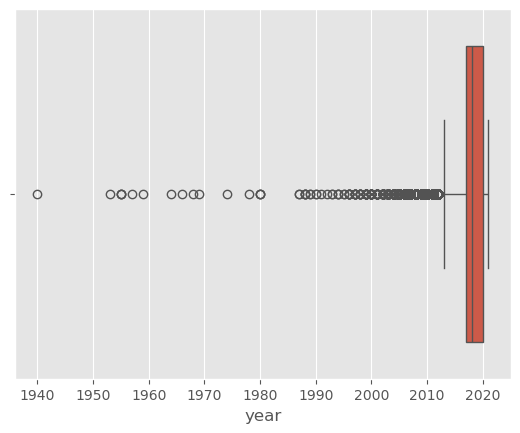

In [23]:
sns.boxplot(data=df_train, x="year")
plt.show()

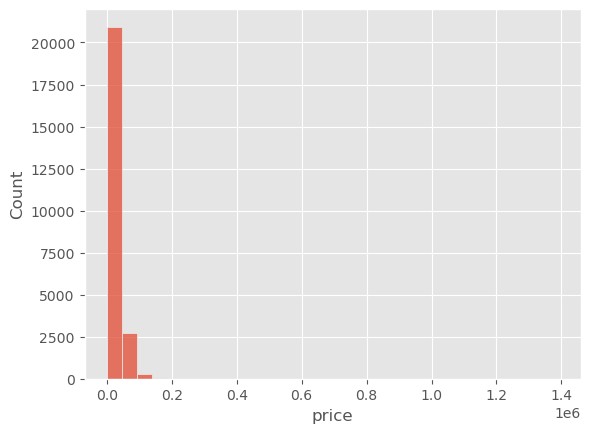

In [24]:
sns.histplot(data=df_train, x="price", bins=30, kde=False)
plt.show()

### Histogram of Price Column

- predicted variable price is right skewed

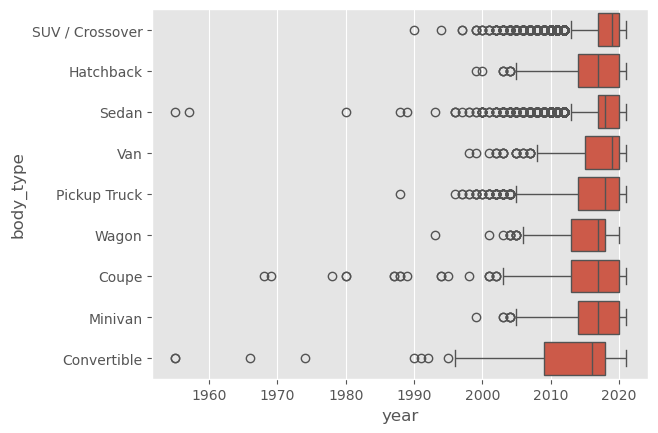

In [26]:
sns.boxplot(data=df_train, x="year", y="body_type")
plt.show()

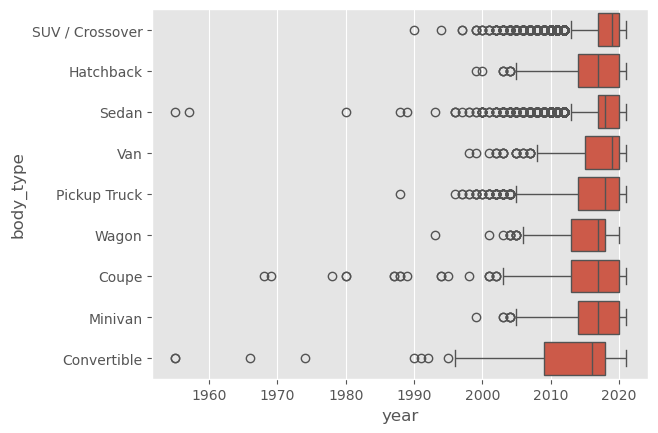

In [27]:
sns.boxplot(data=df_train, x="year", y="body_type")
plt.show()

### Boxplot of Year vs. Body Type
The boxplot shows trends in vehicle body types over the years from years from 1950s to 2020. Most of the body_types in our dataset has mean close to the year between 2015 and 2020. There are some outliers all the way before 1960s. 

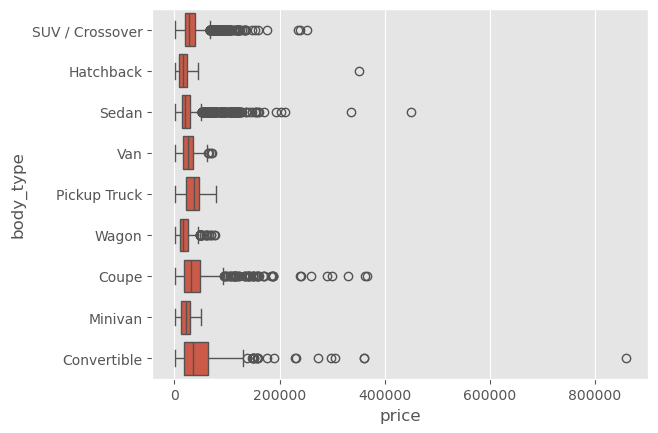

In [30]:
sns.boxplot(data=df_train, x="price", y="body_type")
plt.show()

### Boxplot of Price vs. Body Type
Key Takeaways from the box plot:
- Convertible seems to have highest mean price of all body_types
- SUV/Crossover, Sedan, Coupe and Convertible has more outliers than other body types.
- Hatchback, Sedan, Minivan and Wagon body types appear to be clustered towards the lower end of the
  price range. 


In [32]:
df_train['body_type'].unique()

array(['SUV / Crossover', 'Hatchback', 'Sedan', 'Van', 'Pickup Truck',
       'Wagon', 'Coupe', 'Minivan', nan, 'Convertible'], dtype=object)

In [33]:
# Removing rows with missing body types in both training and test datasets
df_train = df_train[df_train['body_type'] != 'nan']
df_test = df_test[df_test['body_type'] != 'nan']

In [34]:
# Getting summary of sellar_rating column
df_train['seller_rating'].describe()

count    23791.000000
mean         4.018940
std          0.595680
min          1.000000
25%          3.527778
50%          4.142857
75%          4.555556
max          5.000000
Name: seller_rating, dtype: float64

# Handling missing values
Creating a function that drops columns with high rate of missing values (>=40% values are missing)

In [36]:
def find_missing_columns(df, missing_threshold=0.4):
    cols_to_drop = []
    for c in df.columns:
        count_nulls = len(df[c][df[c].isnull()])
        null_rate = count_nulls / df.shape[0]
        if null_rate > missing_threshold:
            cols_to_drop.append(c)
    return cols_to_drop

In [37]:
cols_to_drop = find_missing_columns(df_train)
cols_to_drop

['bed',
 'bed_height',
 'bed_length',
 'cabin',
 'combine_fuel_economy',
 'is_certified',
 'is_cpo',
 'is_oemcpo',
 'owner_count',
 'vehicle_damage_category']

# Removing columns specifed from training+test data
df_train.drop(cols_to_drop, axis=1, inplace=True)
df_test.drop(cols_to_drop, axis=1, inplace=True)

In [39]:
### Filling missing values

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 21753 to 23654
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      24000 non-null  object 
 1   back_legroom             22750 non-null  object 
 2   bed                      203 non-null    object 
 3   bed_height               1457 non-null   object 
 4   bed_length               1457 non-null   object 
 5   body_type                23892 non-null  object 
 6   cabin                    242 non-null    object 
 7   city                     24000 non-null  object 
 8   city_fuel_economy        20507 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             24000 non-null  int64  
 11  dealer_zip               24000 non-null  int64  
 12  description              23235 non-null  object 
 13  engine_cylinders         23305 non-null  object 
 14  engine_displacement    

In [41]:
df_train['is_new']

21753     True
251      False
22941    False
618      False
17090    False
         ...  
29802    False
5390      True
860       True
15795     True
23654    False
Name: is_new, Length: 24000, dtype: bool

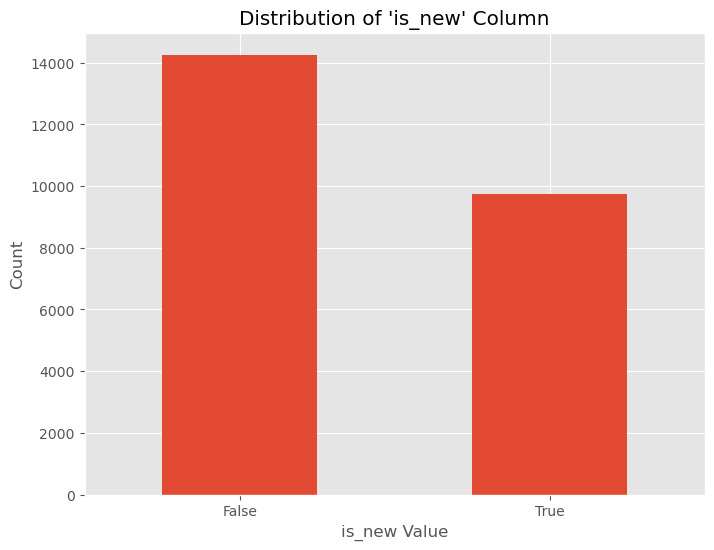

In [42]:
is_new_distribution = df_train['is_new'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
is_new_distribution.plot(kind='bar')
plt.title("Distribution of 'is_new' Column")
plt.xlabel("is_new Value")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



In [43]:
df_train["maximum_seating"]

21753    8 seats
251      4 seats
22941    5 seats
618      5 seats
17090    8 seats
          ...   
29802    5 seats
5390     5 seats
860      5 seats
15795    5 seats
23654    5 seats
Name: maximum_seating, Length: 24000, dtype: object

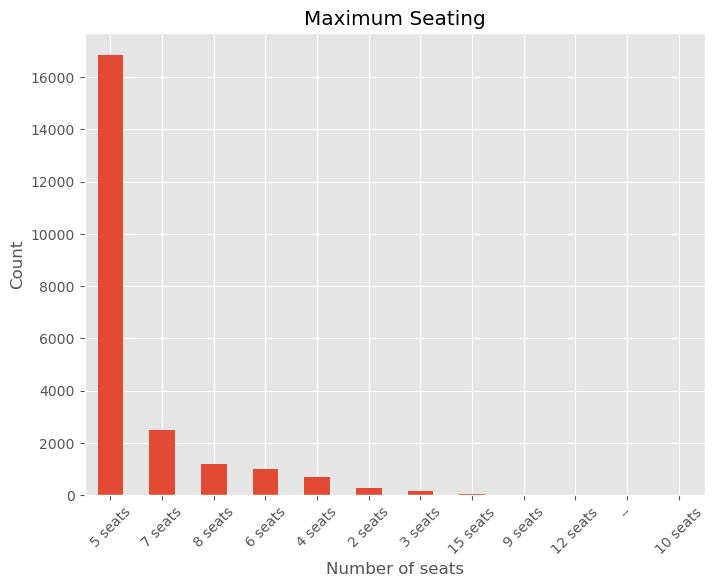

In [44]:
max_seating = df_train['maximum_seating'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
max_seating.plot(kind='bar')
plt.title("Maximum Seating")
plt.xlabel("Number of seats")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



In [45]:
#### Based on the above 5 seats is the highest number of seats in most used cars in the dataset

In [46]:
# df_train.loc[(df_train['mileage'].isna()) & (df_train['is_new'] == True), 'mileage'] = 0

In [47]:
df_train.dropna(subset = ["mileage"], how = "all", inplace = True)
df_test.dropna(subset=["mileage"], how="all", inplace=True)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23169 entries, 251 to 23654
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vin                      23169 non-null  object 
 1   back_legroom             21939 non-null  object 
 2   bed                      201 non-null    object 
 3   bed_height               1420 non-null   object 
 4   bed_length               1420 non-null   object 
 5   body_type                23061 non-null  object 
 6   cabin                    240 non-null    object 
 7   city                     23169 non-null  object 
 8   city_fuel_economy        19852 non-null  float64
 9   combine_fuel_economy     0 non-null      float64
 10  daysonmarket             23169 non-null  int64  
 11  dealer_zip               23169 non-null  int64  
 12  description              22405 non-null  object 
 13  engine_cylinders         22490 non-null  object 
 14  engine_displacement      

In [49]:
# Checking all training data again
df_train.describe(include="all")

vin back_legroom    bed bed_height bed_length        body_type     cabin              city  city_fuel_economy  combine_fuel_economy  daysonmarket    dealer_zip                                        description engine_cylinders  engine_displacement engine_type exterior_color  fleet frame_damaged franchise_dealer franchise_make front_legroom fuel_tank_volume fuel_type has_accidents   height  highway_fuel_economy    horsepower interior_color  isCab  is_certified is_cpo is_new is_oemcpo      latitude    length listed_date listing_color    listing_id     longitude                                   main_picture_url                                   major_options make_name maximum_seating        mileage      model_name   owner_count               power         price salvage  savings_amount  seller_rating          sp_id         sp_name theft_title                 torque transmission transmission_display  trimId trim_name  vehicle_damage_category wheel_system  \
count               23169        21939    201       1420       1420            23061       240             23169       19852.000000                   0.0  23169.000000  23169.000000                                              22405            22490         21834.000000       22490          22905  14544         14544            23169          16056         21939            21939     22563         14544    21939          19852.000000  21834.000000          20183  14544           0.0   2035  23169      1542  23169.000000     21939       23169         23169  2.316900e+04  23169.000000                                              19945                                           21389     23169           21939   23169.000000           23169  13792.000000               19704  2.316900e+04   14544    23169.000000   22961.000000   23169.000000           23169       14544                  19431        22939                22939   22184     22176                      0.0        21996   
unique              23169          166      3          1         59                9         4               182                NaN                   NaN           NaN           NaN                                              19436               27                  NaN          27           2100      2             2                2             36            79              151         6             2      367                   NaN           NaN           1802      2           NaN      1      2         1           NaN       594         565            14           NaN           NaN                                              18388                                            6729        52              12            NaN             660           NaN                 962           NaN       2             NaN            NaN            NaN             247           2                    948            4                   31    6672      2262                      NaN            5   
top     5YMGZ0C53DLL29847      38.3 in  Short         --    67.1 in  SUV / Crossover  Crew Cab  Clinton Township                NaN                   NaN           NaN           NaN  Varsity Lincoln is the #1 volume Lincoln deale...               I4                  NaN          I4          Black  False         False             True           Ford       40.3 in         18.5 gal  Gasoline         False  58.1 in                   NaN           NaN          Black  False           NaN   True  False      True           NaN  189.8 in  2020-09-03         BLACK           NaN           NaN  https://static.cargurus.com/images/forsale/201...  ['Alloy Wheels', 'Bluetooth', 'Backup Camera']      Ford         5 seats            NaN  Grand Cherokee           NaN  181 hp @ 6,000 RPM           NaN   False             NaN            NaN            NaN  Auto Spot LLC.       False  390 lb-ft @ 4,250 RPM            A            Automatic  t86414    SE FWD                      NaN          AWD   
freq                    1         1338     92       1420  

In [50]:
df_train_vin = df_train.groupby(["body_type", "year"])["vin"].nunique().reset_index()
df_train_vin.rename(columns={"vin": "Count"}, inplace=True)
df_train_vin = df_train_vin[df_train_vin["year"] >= 2015]

In [51]:
### Visualizing a line plot for the number of unique cars over time, categorized by Body Type

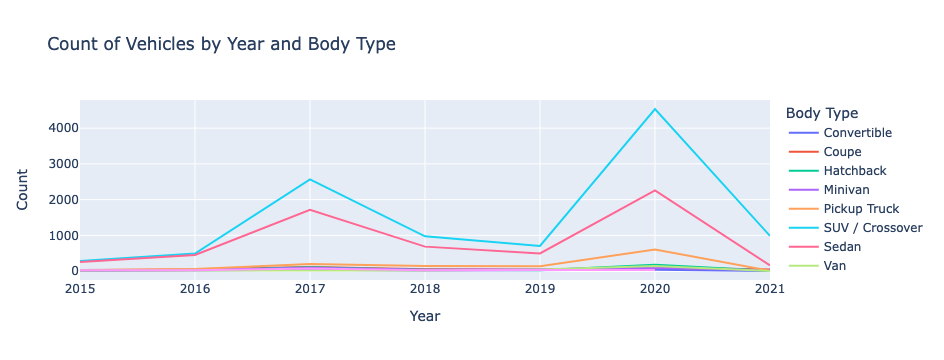

In [52]:
# Plotting with plotly.express
fig = px.line(df_train_vin, x='year', y='Count', color='body_type',
              title='Count of Vehicles by Year and Body Type',
              labels={'year': 'Year', 'Count': 'Count', 'body_type': 'Body Type'})

fig.show()


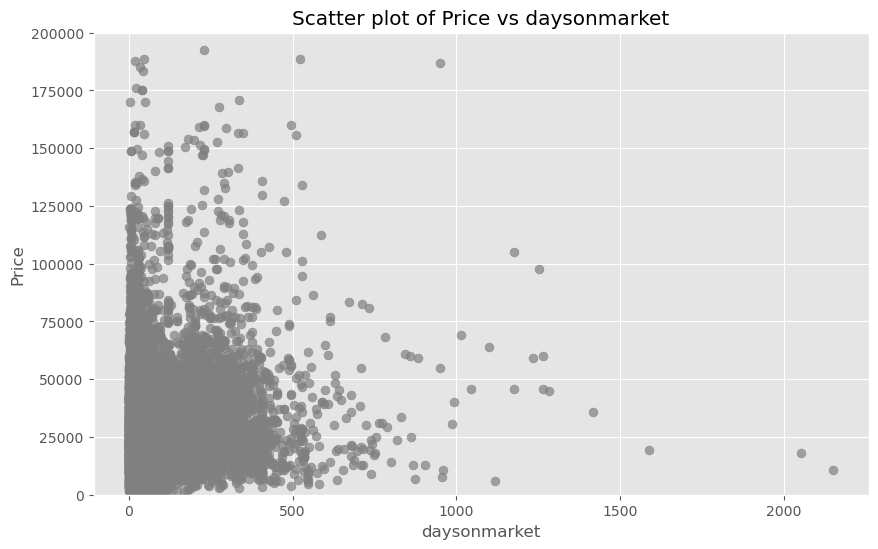

In [53]:
#### # Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_train['daysonmarket'], df_train['price'], color='grey', s=20*2, alpha=0.7)  # s is the size, similar to 'cex'

# Setting labels and limits
plt.xlabel("daysonmarket")
plt.ylabel("Price")
# plt.xlim(2.4, 5.1)
plt.ylim(0, 200000)  # Setting y-axis limit as requested
plt.title("Scatter plot of Price vs daysonmarket")
plt.grid(True)

plt.show()

### Scatterplot to view the how **price** of used car changed based on **days on market** 
- The x axis represents the number of days the items have been on the market ranging from 0 to 2000.
- In hindsight, there seems to be a negative relationship between price and days on the market. 

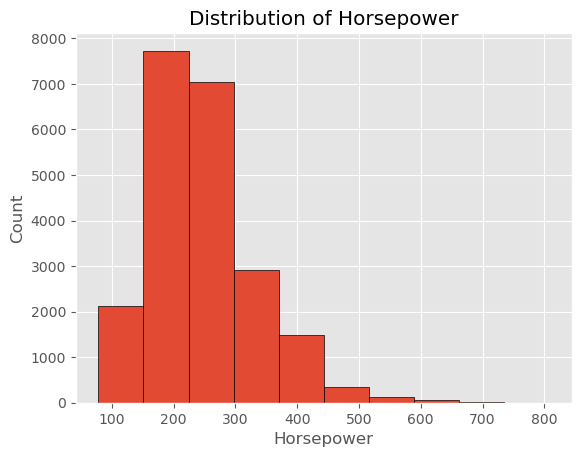

In [55]:
plt.hist(df_train['horsepower'], bins=10, edgecolor='black')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()

This histogram shows the distribution of horsepower values in the dataset. Most cars have horsepower between 100 and 300, with very few cars having horsepower above 500.

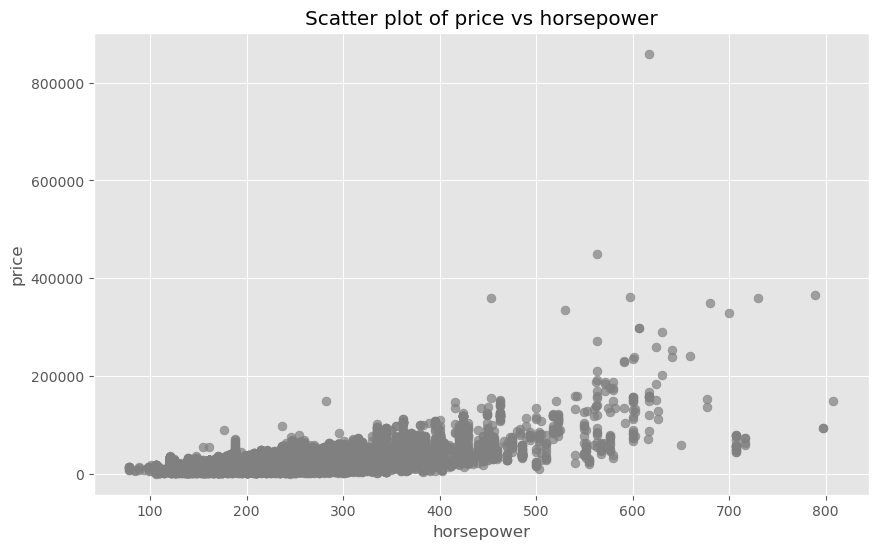

In [57]:
#### # Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_train['horsepower'], df_train['price'], color='grey', s=20*2, alpha=0.7)  # s is the size, similar to 'cex'

# Setting labels and limits
plt.xlabel("horsepower")
plt.ylabel("price")
# plt.xlim(50, 550)
# plt.ylim(0, 65000)
plt.title("Scatter plot of price vs horsepower")
plt.grid(True)

plt.show()

### Scatterplot to view the how **price** of used car changed based on **horsepower** 
- There seems to be positive correlation between price and horsepower.
- However, the relationship is not perfectly linear, and there is significant scatter and variation in the data points. 

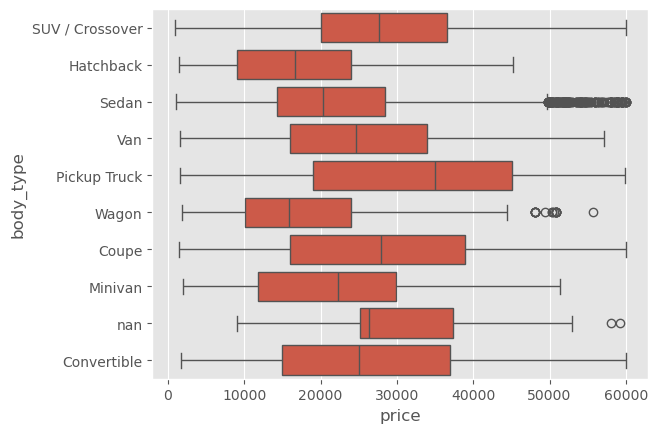

In [59]:
# Making sure price column is numeric, body_type column is a string, and removing rows with missing values.
# Selecting only those body_types with price range between 0 and 60,000. 

df_train['price'] = pd.to_numeric(df_train['price'], errors='coerce')
df_train['body_type'] = df_train['body_type'].astype(str)
df_train2 = df_train.dropna(subset=['price', 'body_type'])
df_train2 = df_train[(df_train['price'] > 0) & (df_train['price'] <= 60000)]
sns.boxplot(data=df_train2, x="price", y="body_type")
plt.show()

### Key takeaways from the boxplot:
- Pickup trucks seems to have highest mean price.
- Wagon have the lowest mean price.
- Sedan and wagan still have outliers.

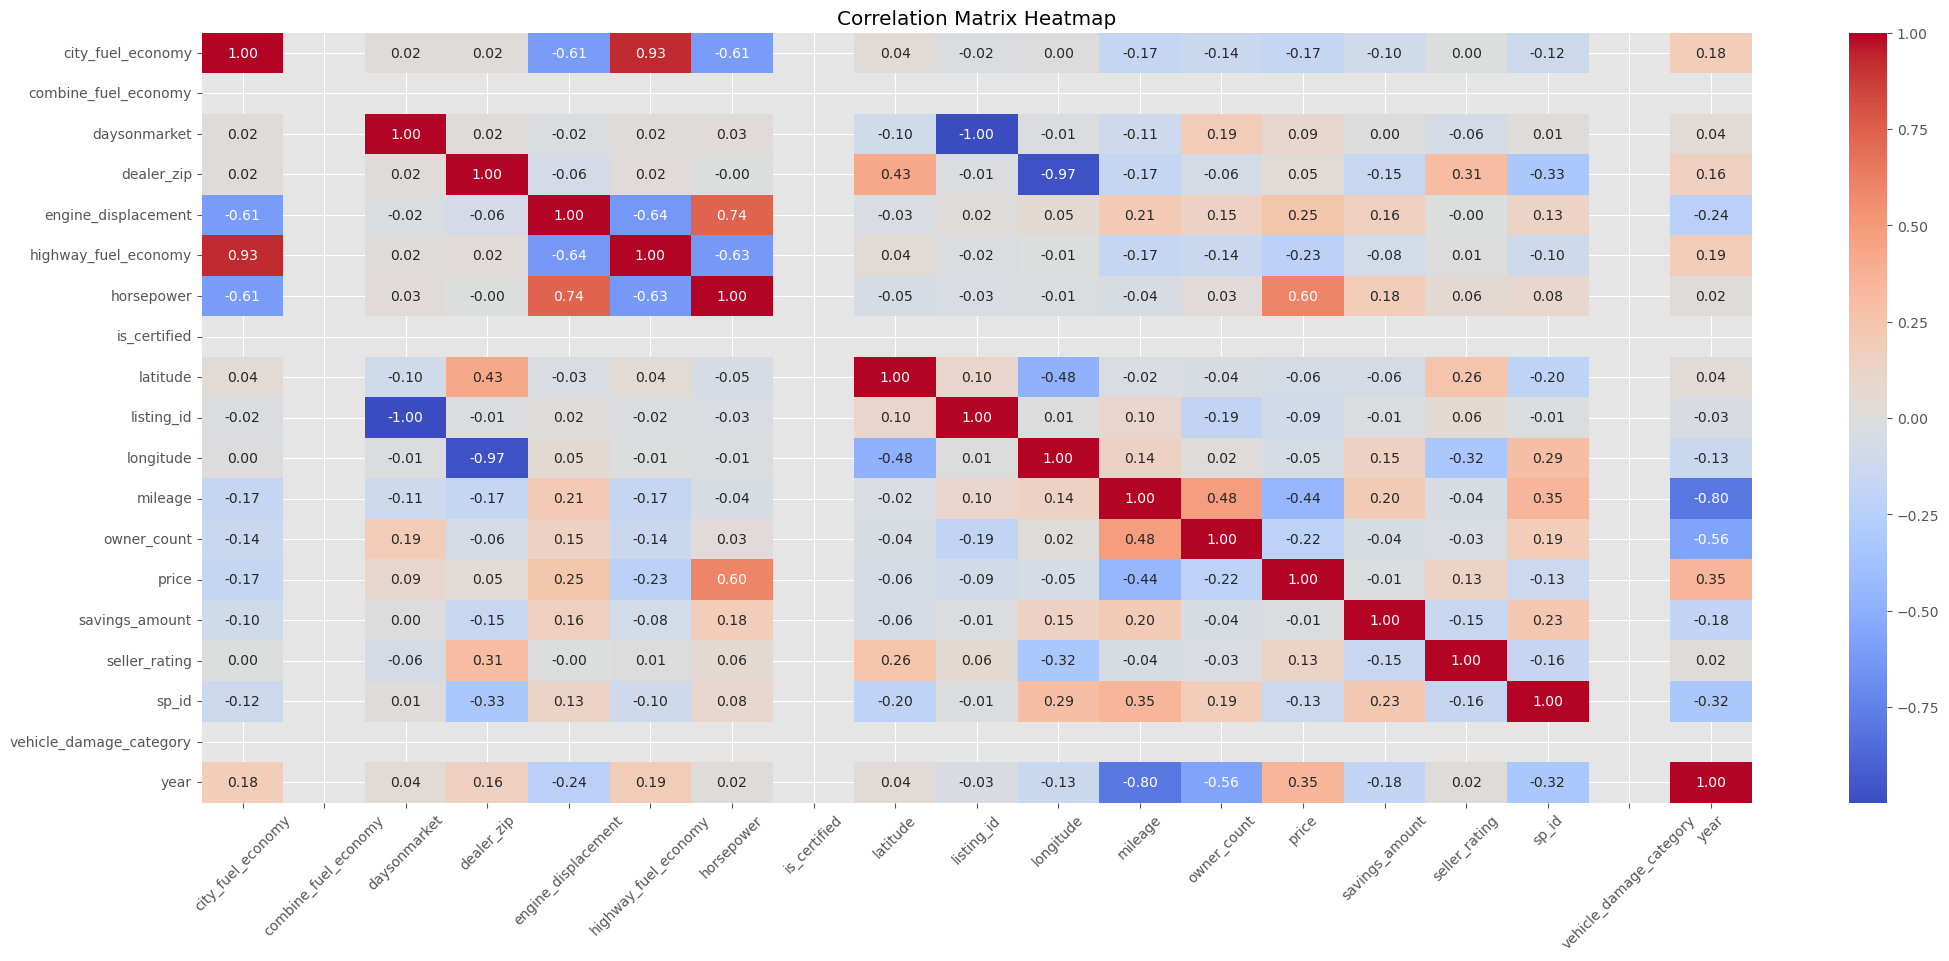

In [61]:
# Step 1: Identifying Numerical and Categorial Columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()


numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate the correlation matrix
correlation_matrix = df_train[numerical_cols].corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(25, 10))  # Adjust the figsize for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.title("Correlation Matrix Heatmap")
plt.show()

### We are trying to see the correlation of different numerical features in data using a heatmap
Key Takeaways from the correlation matrix
- Price seems to have positive correlation with year (0.35), horsepower (0.60), seller rating, and engine displacement.
- Mileage and price have negative correlation (-0.43).

In [63]:
# df_train[(df_train['year'] > 2015 ) & (df_train['mileage'].isna())][['mileage', 'year']]

In [64]:
# df_train[(df_train['is_new'] == True) & (df_train['mileage'].isna())][['vin', 'is_new', 'mileage', 'year']]

# 
Data Filtering 

Based on the above observations and idenitfying the outliers present in our predicted variable, price. We decided to filter our dataset by removing the outliers based on the below criteria.
- For Price: Selecting those price which is greater than or equal to 1,000 and less than or equal to 60,000. This removes any outliers price entries.
- For year: We also narrowed the dataset by selecting from a 8-year period between 2012 to 2020. There were outliers outsidet these years.


In [66]:
df_train = df_train[(df_train['price'] >= 1000) & (df_train['price'] <= 60000)]
df_train = df_train[(df_train['year'] >= 2012) & (df_train['year'] <= 2020)]


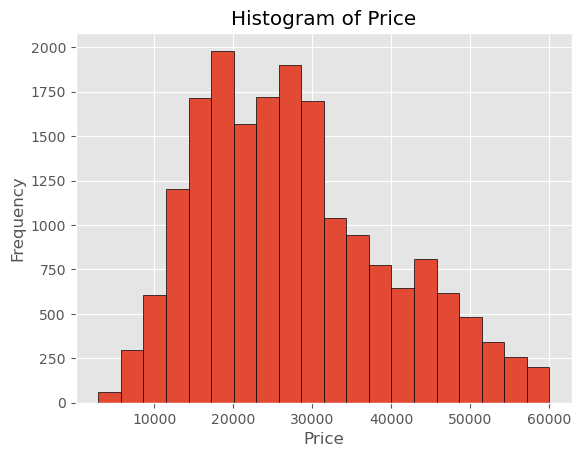

In [67]:
plt.hist(df_train["price"], bins=20, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

## Histogram for Price of the Car: 
After filtering the price variable to be in the range of up to 60,000, we observe that most car prices are centered around 20,000 to 30,000.

In [69]:
### fill missing values rows with 0 when the car is_new == True
### removing NaN values from the feature mileage 

In [70]:
df_train.loc[(df_train['mileage'].isna()) & (df_train['is_new'] == True), 'mileage'] = 0
df_train.dropna(subset = ["mileage"], how = "all", inplace = True)
df_test.dropna(subset=["mileage"], how="all", inplace=True)

In [71]:
#### Dropping NaN values from the below features

In [72]:
df_train = df_train.dropna(subset=['horsepower', 'daysonmarket', 'is_new', 'body_type', 'fuel_type', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'seller_rating'])
df_test = df_test.dropna(subset=['horsepower', 'daysonmarket', 'is_new', 'body_type', 'fuel_type', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'seller_rating'])

# Creating Age attribute
As age of the car is one of the attributes that can impact the price, we create a new column car_age in both df_train and df_test by substracting 'year' column from the current year (2024)

In [74]:
df_train['car_age'] = 2024 - df_train['year']
df_test['car_age'] = 2024 - df_test['year']

### Safal

# Features Selection for Machine Learning Model
Features:

1. horsepower
2. daysonmarket
3. is_new
4. car_age
5. body_type
6. fuel_type
7. city_fuel_economy
8. highway_fuel_economy
9. savings_amount
10. mileage
11. seller_rating

Target variable:
- price

We decided on this columns after a thorough EDA of the dataset.

In [77]:
df_train = df_train[['horsepower', 'daysonmarket', 'is_new', 'car_age',  'body_type', 'fuel_type', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'mileage', 'seller_rating', 'price']]
df_test = df_test[['horsepower', 'daysonmarket', 'is_new','car_age', 'body_type', 'fuel_type', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'mileage','seller_rating', 'price']]

In [78]:
df_train.columns

Index(['horsepower', 'daysonmarket', 'is_new', 'car_age', 'body_type', 'fuel_type', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'mileage', 'seller_rating', 'price'], dtype='object')

# LabelEncoding for categorical variables
Before we built the model, we make sure to convert categorical variables to numerical and handle missing values in those coloumns. Basically below we are using LabelEncode funtion available at Sklearn to encode body_type and fuel_type columns to prepare data for machine learning models. We ensure there is consistent encoding between train and test datasets.

- Below we are removing original categorical columns (fuel_type and body_type) and creating new encoded numerical columns (body_type_encoded and fuel_type_encoded) for those categories.

In [80]:
# from sklearn.preprocessing import LabelEncoder

# Handle missing values for both 'body_type' and 'fuel_type' columns
df_train.loc[:, 'body_type'] = df_train['body_type'].fillna('unknown')
df_test.loc[:, 'body_type'] = df_test['body_type'].fillna('unknown')

df_train.loc[:, 'fuel_type'] = df_train['fuel_type'].fillna('unknown')
df_test.loc[:, 'fuel_type'] = df_test['fuel_type'].fillna('unknown')

# Initialize LabelEncoder for 'body_type'
body_type_encoder = LabelEncoder()
body_type_encoder.fit(pd.concat([df_train['body_type'], df_test['body_type']], axis=0).unique())

# Transform 'body_type'
df_train.loc[:, 'body_type_encoded'] = body_type_encoder.fit_transform(df_train['body_type'])
df_test.loc[:, 'body_type_encoded'] = body_type_encoder.transform(df_test['body_type'])

# Initialize LabelEncoder for 'fuel_type'
fuel_type_encoder = LabelEncoder()
fuel_type_encoder.fit(pd.concat([df_train['fuel_type'], df_test['fuel_type']], axis=0).unique())

# Transform 'fuel_type'
df_train.loc[:, 'fuel_type_encoded'] = fuel_type_encoder.fit_transform(df_train['fuel_type'])
df_test.loc[:, 'fuel_type_encoded'] = fuel_type_encoder.transform(df_test['fuel_type'])

# Drop the original columns
df_train = df_train.drop(columns=['body_type', 'fuel_type'])
df_test = df_test.drop(columns=['body_type', 'fuel_type'])

# Body_type encoded value count
Checking to see the number of time each encoded values appears for body_types.There are 9 types of body types which also includes a type with 'nan' values.

In [82]:
df_train['body_type_encoded'].value_counts()

body_type_encoded
5    8682
6    5728
4     842
2     389
3     350
1     324
8     200
7     137
0      81
9       2
Name: count, dtype: int64

# Below code displays the array of original categorical labels.

In [84]:
body_type_encoder.classes_

array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup Truck',
       'SUV / Crossover', 'Sedan', 'Van', 'Wagon', 'nan'], dtype=object)

# Understanding the lables for body_type
This code helps us to see which body type is represented by which numerical value. For example: Convertible is 0, Coupe is 1 and so on.

In [86]:
body_type_mapping = pd.DataFrame({
    'Class': body_type_encoder.classes_,
    'Encoded Value': range(len(body_type_encoder.classes_))
})
body_type_mapping

Class  Encoded Value
0      Convertible              0
1            Coupe              1
2        Hatchback              2
3          Minivan              3
4     Pickup Truck              4
5  SUV / Crossover              5
6            Sedan              6
7              Van              7
8            Wagon              8
9              nan              9

# Understanding the lables for fuel type
This code helps us to see which fuel type is represented by which numerical value. For example: Biodiesel is 0, Diesel is 1 and so on.

In [88]:
fuel_type_mapping = pd.DataFrame({
    'Class': fuel_type_encoder.classes_,
    'Encoded Value': range(len(fuel_type_encoder.classes_))
})
fuel_type_mapping

Class  Encoded Value
0          Biodiesel              0
1             Diesel              1
2  Flex Fuel Vehicle              2
3           Gasoline              3
4             Hybrid              4

In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16735 entries, 251 to 23654
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   horsepower            16735 non-null  float64
 1   daysonmarket          16735 non-null  int64  
 2   is_new                16735 non-null  bool   
 3   car_age               16735 non-null  int64  
 4   city_fuel_economy     16735 non-null  float64
 5   highway_fuel_economy  16735 non-null  float64
 6   savings_amount        16735 non-null  int64  
 7   mileage               16735 non-null  float64
 8   seller_rating         16735 non-null  float64
 9   price                 16735 non-null  float64
 10  body_type_encoded     16735 non-null  int64  
 11  fuel_type_encoded     16735 non-null  int64  
dtypes: bool(1), float64(6), int64(5)
memory usage: 1.5 MB


# Checking for null
Confirming no columns contains any null values before model building process starts..

In [91]:
df_train.isna().sum()

horsepower              0
daysonmarket            0
is_new                  0
car_age                 0
city_fuel_economy       0
highway_fuel_economy    0
savings_amount          0
mileage                 0
seller_rating           0
price                   0
body_type_encoded       0
fuel_type_encoded       0
dtype: int64

# Car Price Prediction Model
The below code preprocesses and trains a linear regression model to predict car prices using various features who have selection after a thorough EDA process.

# Steps taken to build the Model
1. Feature selection ( We selected 11 features from the dataset)
2. The target variable is Price.
3. Data Transformation ( Price is log-transfromed to handle skewed distribution and features are standardized using StandardScaler() to normalize data.
4. Model Training ( Used Linear Regression Algorithm on scaled training data before model fiiting)
5. Prediction made on both training and test datasets. ( Log-transformed predictions are converted back to original scale)

In [93]:
# from sklearn.preprocessing import StandardScaler


# Define features and target
features = ['horsepower', 'daysonmarket', 'is_new', 'car_age',
            'city_fuel_economy', 'highway_fuel_economy', 'savings_amount',
            'mileage', 'seller_rating', 'body_type_encoded', 'fuel_type_encoded']
target = 'price'

# Split data into X and y
X_train = df_train[features]
y_train = df_train[target]
y_train_logged = np.log1p(y_train)

X_test = df_test[features]
y_test = df_test[target]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_logged)

# Predictions on training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Reverse log transformation to get predictions in original scale
y_train_pred = np.expm1(y_train_pred)
y_test_pred = np.expm1(y_test_pred)

# Model Coefficients and Intercept Analysis
Key Insights from the below code:
1. Mileage has strongest negative impact on price (-0.16331129)
2. Horsepower has strongest positive impact on price (0.25488918)
3. Highway Fuel Economy has negative impact on price (-0.15600528)
4. Car Age has negative impact on price (-0.14221459)

In [95]:
# Model coefficients and intercept
coeff = model.coef_
print('Coefficients:', coeff)
intercept = model.intercept_
print('Intercept:', intercept)


Coefficients: [ 0.25488918 -0.0174622   0.03066657 -0.14221459  0.14378066 -0.15600528
  0.00215451 -0.16331129  0.0269425   0.01122726 -0.00494754]
Intercept: 10.127665224868643


# Model Performance Evaluation
R-Squared Analysis: 0.39
- Our model is not highly accurate but it is also not a poor model.
- The model explains 39% of the variance in car prices indicating moderate predictive power.
- The model has significant room for improvement.  

In [97]:
# from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.39


# Model Performance Evaluation
Error Metrics Analysis
1. Mean Squared Erro (MSE): 388,933,254.80
2. Root Mean Squared Erro (RMSE): $19,721.39

This result shows that average prediction error is approximately $19,634. For a cheaper cars, this error is substantial. We can conclude that the mdodel is not precise enough for exact pricing but can provide rough price estimates.

In [99]:
# from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}")

MSE: 388933254.80, RMSE: 19721.39


# Residual Plot Analysis


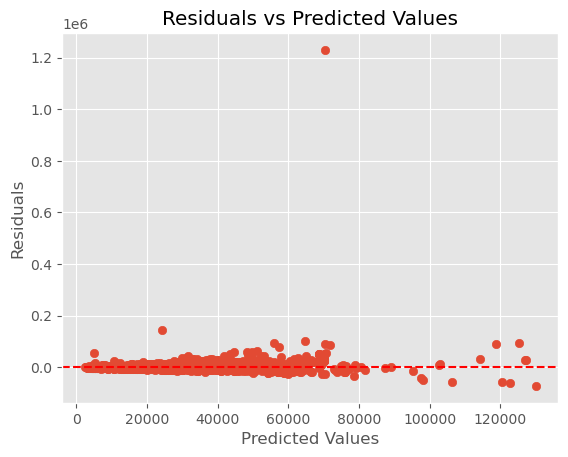

In [101]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Residual Plot Analysis
- There are two significant outliers in the model. These also may have impacted the performance of our model.
- The consistency in the variance could also improve as residuals close 60,000 are further from the zero line.

# Histogram of Residuals

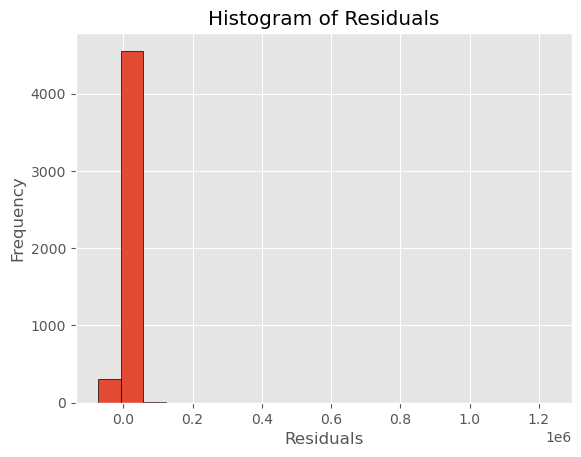

In [104]:
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


Here we are visualizing distribution of prediction errors.
- The histogram has a clear peak around 0.0 indicating that the mojority of the residuals are centered near zero.


# Scatter Plot for actual vs predicted prices for both training and test data.


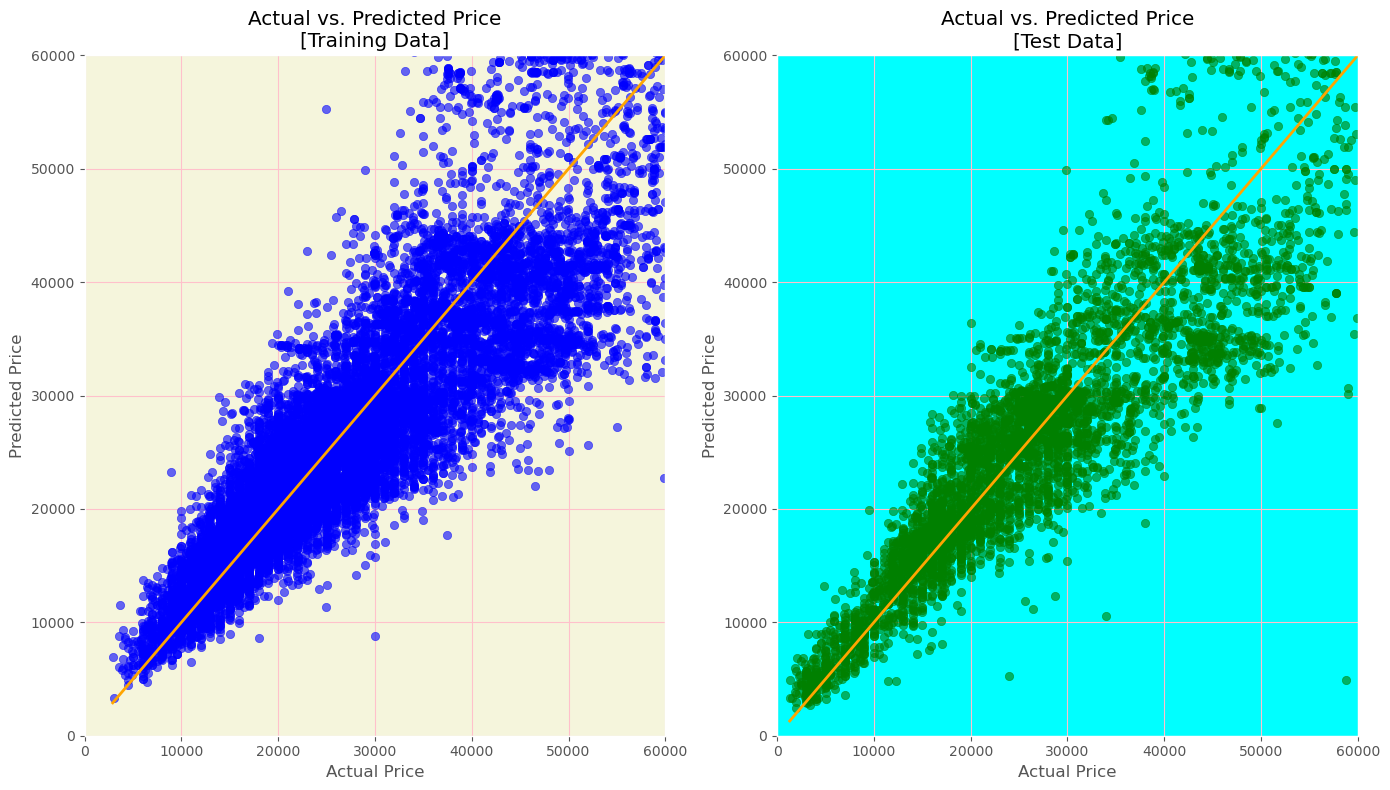

In [107]:
# Create the figure and axes
unpopdata_figure, unpopdata_axes = plt.subplots(figsize=(14, 8), nrows=1, ncols=2)

# Training Data: Predictions vs Actuals
unpopdata_axes[0].scatter(y_train, y_train_pred, color='blue', alpha=0.6)  # Use y_pred_train
unpopdata_axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='orange', linestyle='-', linewidth=2)
unpopdata_axes[0].set_title('Actual vs. Predicted Price\n[Training Data]')
unpopdata_axes[0].set_facecolor('beige')
unpopdata_axes[0].set_ylim(0, 60000)
unpopdata_axes[0].set_xlim(0, 60000)
unpopdata_axes[0].grid(color='pink')
unpopdata_axes[0].set_xlabel('Actual Price')
unpopdata_axes[0].set_ylabel('Predicted Price')

# Test Data: Predictions vs Actuals
unpopdata_axes[1].scatter(y_test, y_test_pred, color='green', alpha=0.6)  # Use y_pred_test
unpopdata_axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', linestyle='-', linewidth=2)
unpopdata_axes[1].set_title('Actual vs. Predicted Price\n[Test Data]')
unpopdata_axes[1].set_facecolor('cyan')
unpopdata_axes[1].set_ylim(0, 60000)
unpopdata_axes[1].set_xlim(0, 60000)
unpopdata_axes[1].grid(color='pink')
unpopdata_axes[1].set_xlabel('Actual Price')
unpopdata_axes[1].set_ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()


One of the observation that can be made from the below scatter plot is that our model is experiencing heteroscedasticity which is not ideal. The variance of the residuals is increasing as the actual price increases. This pattern suggests that our model's predictive power is weaker for higher values of the target variable (price).

## Saar

# Model 2: Classification Model
Next we will build a classification model to find if the car one is buying is a good deal or not? To achieve this we have come up three score that will help us quantify what kind of deal you are getting.

We will use three reasonable way to score the data based on their relationship of the car being a good deal or not.
1. Price Score
2. Condition Score
3. Performance Score

# Creating Price Score Function
We provide the score of 30 or 20 based on two conditions:
1. If the price you are paying is below the 50th percentile (median) of prices.
2. If the saving amount is above the 25th percentile of savings.

We then update both df_train and df_test dataframes with price_score column.

In [112]:
def calculate_price_score(df):

    # Define thresholds
    price_50th = df_train['price'].quantile(0.50)
    savings_25th = df_train['savings_amount'].quantile(0.25)


    df['price_score'] = np.where(
        (df['price'] < price_50th) &
        (df['savings_amount'] > savings_25th),
        30, # Good score
        20  # Decent Score
    )
    return df

df_train = calculate_price_score(df_train)
df_test = calculate_price_score(df_test)

df_train[['price', 'savings_amount', 'daysonmarket', 'mileage', 'seller_rating', 'price_score']].head()

price  savings_amount  daysonmarket  mileage  seller_rating  price_score
251    25495.0            1926            25  74046.0       2.963636           30
22941  38200.0            1591            41  60992.0       4.250000           20
17090  36499.0            3302           172  33611.0       4.285714           20
6362   25995.0            1568            54  44872.0       4.237333           20
24680  26777.0            2318            11   8217.0       4.611111           20

# Histogram of Distribution Price Score
Visually understanding how the price_score is distributed in the df_train dataset.

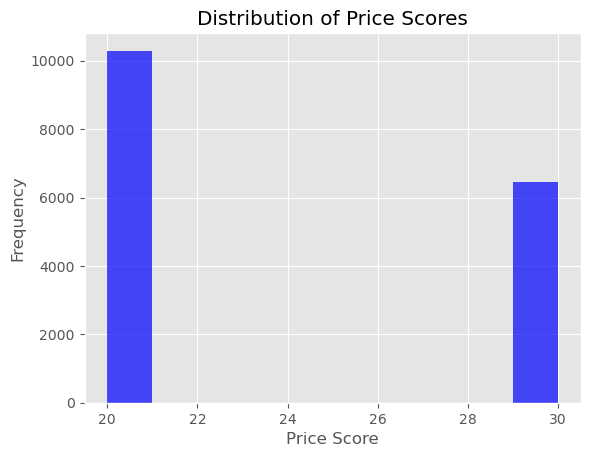

In [114]:
plt.hist(df_train['price_score'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Price Score')
plt.ylabel('Frequency')
plt.title('Distribution of Price Scores')
plt.show()


# Creating Condition Score Function
We provide the score of 15 or 10 based on two conditions:
1. If the Car's mileage is below the median mileage, car's age is 10 years or younger and car is marked as new then condition score is 15
2. Else the condition score is 10.

We then update both df_train and df_test dataframes with condition_score column.

In [116]:
def calculate_condition_score(df):

    # Define thresholds
    mileage_50th = df_train['mileage'].quantile(0.50)

    # Apply conditions
    df['condition_score'] = np.where(
        (df['mileage'] < mileage_50th) &
        (df['car_age'] <= 10) &
        (df['is_new'] == True),
        15, # Good score
        10  # Decent Score
    )
    return df

# Update df_train and df_test using the fixed function
df_train = calculate_condition_score(df_train)
df_test = calculate_condition_score(df_test)

# Display a sample of the results for both datasets
df_train[['mileage', 'seller_rating', 'is_new', 'condition_score']].head()


mileage  seller_rating  is_new  condition_score
251    74046.0       2.963636   False               10
22941  60992.0       4.250000   False               10
17090  33611.0       4.285714   False               10
6362   44872.0       4.237333   False               10
24680   8217.0       4.611111   False               10

# Histogram of Distribution Condition Score
Visually understanding how the condition_score is distributed in the df_train dataset.
We have mre than 6000 rows with condition score 15 and over 10,000 with condition score 10.

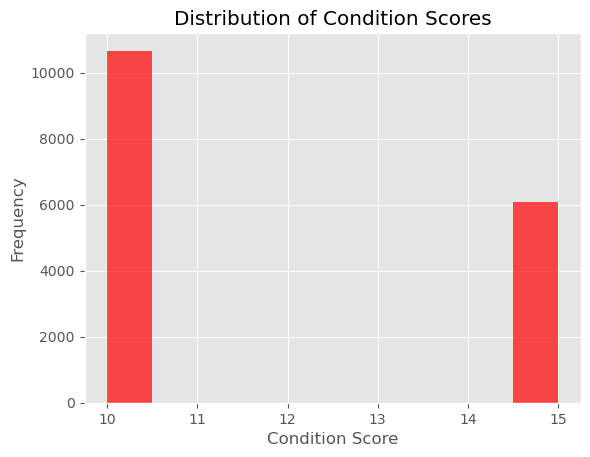

In [118]:
plt.hist(df_train['condition_score'], bins=10, color='red', alpha=0.7)
plt.xlabel('Condition Score')
plt.ylabel('Frequency')
plt.title('Distribution of Condition Scores')
plt.show()


# Creating Performance Score Function
We provide the score of 15 or 10 based on two conditions:
1. If the car's horsepower is greater than the 25th percentile of horsepower values and if the combined fuel economy is above the 25th percentile, then performance score is 15.
2. Else the Performance Score is 10.

We then update both df_train and df_test dataframes with condition_score column.

In [120]:
# Define a function to calculate performance_score
def calculate_performance_score(df):

    horsepower_25th = df['horsepower'].quantile(0.25)
    combined_fuel_economy = (df['city_fuel_economy'] + df['highway_fuel_economy']) / 2
    fuel_economy_25th = combined_fuel_economy.quantile(0.25)

    df['combined_fuel_economy'] = combined_fuel_economy

    df['performance_score'] = np.where(
        (df['horsepower'] > horsepower_25th) &
        (df['combined_fuel_economy'] > fuel_economy_25th),
        15, # High Performance
        10  # Decent Performance
    )
    return df


# Update df_train and df_test using the function for performance_score
df_train = calculate_performance_score(df_train)
df_test = calculate_performance_score(df_test)

# Display a sample of the results for both datasets
df_train[['horsepower', 'city_fuel_economy', 'highway_fuel_economy', 'combined_fuel_economy', 'performance_score']].head()




horsepower  city_fuel_economy  highway_fuel_economy  combined_fuel_economy  performance_score
251         555.0               12.0                  17.0                   14.5                 10
22941       340.0               17.0                  23.0                   20.0                 10
17090       355.0               16.0                  22.0                   19.0                 10
6362        288.0               15.0                  22.0                   18.5                 10
24680       295.0               18.0                  25.0                   21.5                 10

# Histogram of Distribution Performance Score
Visually understanding how the performance_score is distributed in the df_train dataset.
We have mre than 7500 rows with performance score 15 and over 10,000 with condition score 10.

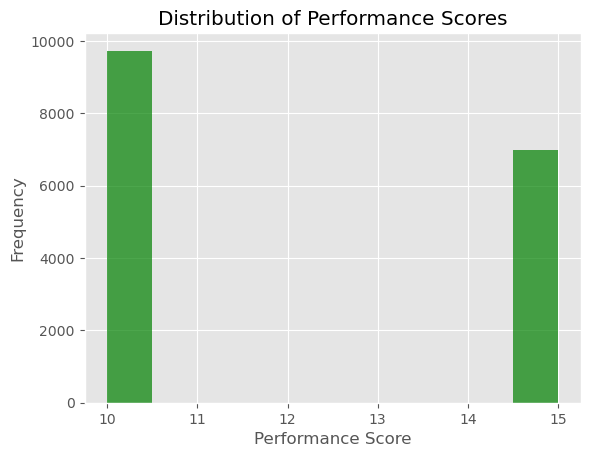

In [122]:
plt.hist(df_train['performance_score'], bins=10, color='green', alpha=0.7)
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Scores')
plt.show()


In [123]:
df_train.head()

horsepower  daysonmarket  is_new  car_age  city_fuel_economy  highway_fuel_economy  savings_amount  mileage  seller_rating    price  body_type_encoded  fuel_type_encoded  price_score  condition_score  combined_fuel_economy  performance_score
251         555.0            25   False       11               12.0                  17.0            1926  74046.0       2.963636  25495.0                  5                  3           30               10                   14.5                 10
22941       340.0            41   False       10               17.0                  23.0            1591  60992.0       4.250000  38200.0                  5                  3           20               10                   20.0                 10
17090       355.0           172   False        7               16.0                  22.0            3302  33611.0       4.285714  36499.0                  5                  2           20               10                   19.0                 10
6362        288.0            54   False        7               15.0                  22.0            1568  44872.0       4.237333  25995.0                  5                  3           20               10                   18.5                 10
24680       295.0            11   False        6               18.0                  25.0            2318   8217.0       4.611111  26777.0                  5                  3           20               10                   21.5                 10

# Combining Price_Score, Performance_Score and Condition_Score
The below function sums the three score calculated above and stores it in a new column named combined_score. This is necessary for our final classification of classifying the deal in three categories:
1. Excellent Deal
2. Good Deal
3. Decent Deal

Deal Classification:
1. Deals with a combined score >= 55 are classified as Excellent Deal.
2. Deals with a combined score between 45 and 54 are classified as Good Deal
3. Deals with a combined score < 45 are classified as Decent Deal.

In [125]:
def calculate_combined_score(df):
    # Calculate combined_score
    df['combined_score'] = (
        df['price_score'] + df['performance_score'] + df['condition_score']
    )

    # Classify good_deal
    df['good_deal'] = np.where(
        df['combined_score'] >= 55, 'Excellent Deal',
        np.where(
            (df['combined_score'] >= 45) & (df['combined_score'] < 55), 'Good Deal',
            'Decent Deal'
        )
    )
    return df

# Apply the function to the datasets
df_train = calculate_combined_score(df_train)
df_test = calculate_combined_score(df_test)

# Verify the result
df_train[['price_score', 'condition_score', 'performance_score', 'combined_score', 'good_deal']].head()


price_score  condition_score  performance_score  combined_score    good_deal
251             30               10                 10              50    Good Deal
22941           20               10                 10              40  Decent Deal
17090           20               10                 10              40  Decent Deal
6362            20               10                 10              40  Decent Deal
24680           20               10                 10              40  Decent Deal

# Labeling good_deal categories into numerical values. 
Mapping Decent Deal, Good Deal and Excellent Deal to integers 0, 1, 2 respectively. 

In [127]:
df_train['good_deal_encoded'] = df_train['good_deal'].map({"Decent Deal": 0, "Good Deal": 1, "Excellent Deal": 2})
df_test['good_deal_encoded'] = df_test['good_deal'].map({"Decent Deal": 0, "Good Deal": 1, "Excellent Deal": 2})


# Feature Selection for Classification Model Building
Here we are extracting subset of columns from both the df_train and df_test datasets to create a new dataframes df_train_class and df_test_class that focus on the relevant features and the target variable which in our case is good_deal_encoded column.

In [129]:
df_train_class = df_train[['horsepower', 'daysonmarket', 'is_new', 'combined_fuel_economy', 'savings_amount', 'mileage', 'seller_rating','price','good_deal_encoded']]
df_test_class = df_test[['horsepower', 'daysonmarket', 'is_new', 'combined_fuel_economy', 'savings_amount', 'mileage', 'seller_rating','price','good_deal_encoded']]


# Distribution of Deals
- 0 (Decent Deal): 15.24% of the data points belong to this class.
- 1 (Good Deal): 69.26% of the data points belong to this class.
- 2 (Excellent Deal): 15.50% of the data points belong to this class.

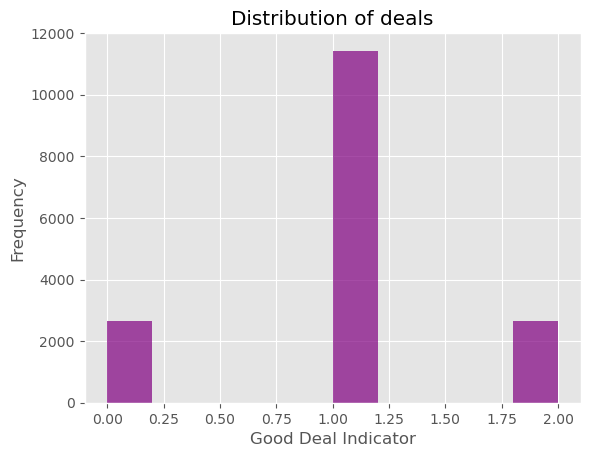

good_deal_encoded
1    0.683059
0    0.158829
2    0.158112
Name: proportion, dtype: float64

In [131]:
plt.hist(df_train_class['good_deal_encoded'], bins=10, color='purple', alpha=0.7)
plt.xlabel('Good Deal Indicator')
plt.ylabel('Frequency')
plt.title('Distribution of deals')
plt.show()

df_train_class['good_deal_encoded'].value_counts(normalize=True)

# Setting up feature and target variables
For model training and testing, we are selecting 8 feature variables and 1 target variable (good_deal_encoded)

In [133]:
features = ['horsepower', 'daysonmarket', 'is_new', 'city_fuel_economy', 'highway_fuel_economy', 'savings_amount', 'mileage', 'seller_rating','price']
target = 'good_deal_encoded'


X_train_class = df_train[features]
y_train_class = df_train[target]


X_test_class = df_test[features]
y_test_class = df_test[target]#

# Logistic Regression Model
After feature scaling using StandardScaler function, we initialize the Logistic Regression model.
Then we are predicting the class labels for both the training and test sets with predict() function and calculating probabilities of each class with predict_proba() function.

In [135]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Fit the logistic regression model
clf = LogisticRegression(random_state=RANDOM_STATE, solver='saga', max_iter=1000)
clf.fit(X_train_class_scaled, y_train_class)

# Predictions
y_pred_train_class = clf.predict(X_train_class_scaled)
y_pred_test_class = clf.predict(X_test_class_scaled)
y_pred_proba_train_class = clf.predict_proba(X_train_class_scaled)
y_pred_proba_test_class = clf.predict_proba(X_test_class_scaled)

solver='saga' minimizes the cost function/gradient descent of logistic regression, which measures the error between predicted probabilities and actual values. 
max_iter = 1000, is how many steps it will do the adjust the model's weights and minimize the error.

# Predicted Label for the training set
Through 1D array, displaying the predicted labels for the test set.

In [138]:
print(y_pred_test_class)

[1 1 1 ... 1 1 1]


# Predicted Probabilities

The output represents the predicted probabilities for each class (Decent Deal, Good Deal, Excellent Deal) for every sample in the test set. For example, the first row [5.81%, 85.01%, 9.18%] shows that the model predicts a 5.81% probability for Class 0 (Decent Deal), an 85.01% probability for Class 1 (Good Deal), and a 9.18% probability for Class 2 (Excellent Deal). This indicates that the model is most confident that this sample belongs to the Good Deal class.

In [140]:
print(y_pred_proba_test_class)

[[5.80745218e-02 8.50131225e-01 9.17942536e-02]
 [4.37645159e-03 9.95617116e-01 6.43210952e-06]
 [6.72199931e-06 9.99899039e-01 9.42387663e-05]
 ...
 [2.26856869e-08 9.99927119e-01 7.28587705e-05]
 [3.27603604e-02 5.01973185e-01 4.65266454e-01]
 [5.80450788e-06 9.99882448e-01 1.11747142e-04]]


# Value counts of Actual and Predicted labels:
Below the plot is displaying a side-by-side bar chart with actual distribution of good_deal_encoded on the left blue bars and the predicted distribution on the right with red bars. It is not perfect as there are some mismatch cases between the actual and predicted distributions in all three labels.

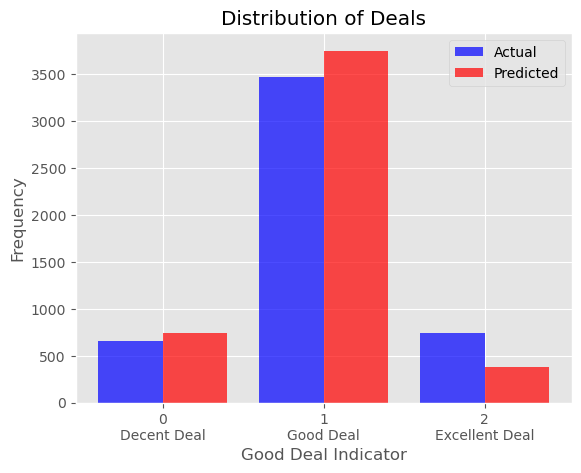

In [142]:
actual_counts = df_test_class['good_deal_encoded'].value_counts()
predicted_counts = pd.Series(y_pred_test_class).value_counts()

indices = sorted(set(actual_counts.index).union(set(predicted_counts.index)))
actual_counts = actual_counts.reindex(indices, fill_value=0)
predicted_counts = predicted_counts.reindex(indices, fill_value=0)

label_mapping = {0: "Decent Deal", 1: "Good Deal", 2: "Excellent Deal"}
labels = [f"{i}\n{label_mapping[i]}" for i in indices]  # Multi-line labels

# Plot bar chart
x = np.arange(len(indices))
plt.bar(x - 0.2, actual_counts, width=0.4, color='blue', alpha=0.7, label='Actual')
plt.bar(x + 0.2, predicted_counts, width=0.4, color='red', alpha=0.7, label='Predicted')
plt.xticks(x, labels)  # Use multi-line labels
plt.xlabel('Good Deal Indicator')
plt.ylabel('Frequency')
plt.title('Distribution of Deals')
plt.legend()
plt.show()


In [143]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score, auc, precision_score, classification_report
print(classification_report(y_train_class, y_pred_train_class))
print(classification_report(y_test_class, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2658
           1       0.81      0.91      0.86     11431
           2       0.59      0.29      0.39      2646

    accuracy                           0.79     16735
   macro avg       0.73      0.66      0.67     16735
weighted avg       0.77      0.79      0.77     16735

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       659
           1       0.81      0.88      0.85      3477
           2       0.54      0.27      0.36       738

    accuracy                           0.77      4874
   macro avg       0.66      0.63      0.63      4874
weighted avg       0.75      0.77      0.75      4874



# Classification Report for both training and test sets.
Breakdown:
Class 0 (Decent Deal):
- Precision (how accurate the positive predictions are?): 78% on training data and 64% on test.
- Recall (how sensitive the model is to positive items?): 77% on training set but it drops slighlty on test set to 73%. It indicates the model is identifying most of the true decent deal cases.
- F1-score (harmonic mean of precision and recall): It is reasonable but it decreases from training (78%) to test (68%)

Class 1 (Good Deal):
- Training Data: Precision = 0.81, Recall = 0.91, F1-Score = 0.86
- Test Data: Precision = 0.81, Recall = 0.89, F1-Score = 0.85
  Precision and Recall are both quite high for this class. F1-score is also high showing good balance between precision and recall.

Class 2 (Excellent Deal):
- Training Data: Precision = 0.58, Recall = 0.29, F1-Score = 0.39
- Test Data: Precision = 0.58, Recall = 0.27, F1-Score = 0.37
  Precision for class 2 is low in both train and test dataset. Recall is also very low meaning model is missing a large number of actual excellent deals.

# Conclusion
1. Model performs very well with Class 1 (Good Deal)
2. Model performs reasonably well with Class 0 (Decent Deal) but its precision and recall drop slightly on the test set which might suggest overfitting on training data.
3. Possibly due to lower representation, Model does not perform that well with Class 2 (Excellent Deal).



# Confusion Matrix for the Classification Results
Summary:
- For Class 0(Decent Deal): Out of all the actual Class 0 samples, 463 were correctly predicted, while 166 were misclassified as Class 1 and 15 were classified as Class 2.
- For Class 1(Good Deal): 3037 instances were correctly predicted as Class 1, 262 were misclassified as Class 0 and 134 as Class 2.
- For Class 2 (Excellent Deal): 202 were correctly predicted as Class 2, 2 were misclassified as Class 0 and 543 were misclassified as Class 1.


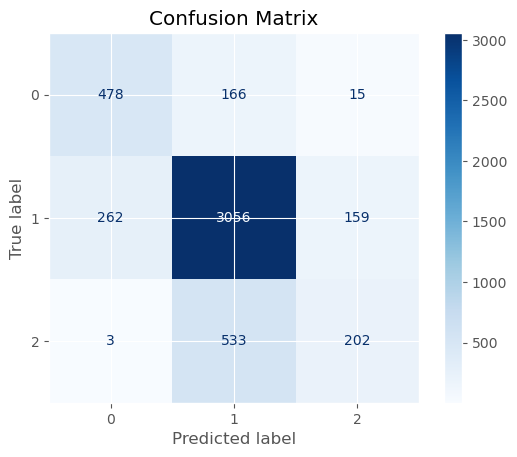

In [146]:
cm = confusion_matrix(y_test_class, y_pred_test_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Model Performance Improvement
As there are instances of some classes being misclassified, it is apparent that there is a room for improvement in our model. This could be done by following various strategies such as resampling, better model selection or feature engineering.
To improve a Linear Regression model, focus on creating meaningful features, removing unnecessary ones, and using regularization techniques like L1 (Lasso) or L2 (Ridge) to prevent overfitting and select important variables. Scaling features and handling outliers with robust regression methods further enhance reliability, while k-fold cross-validation ensures the model generalizes well. For a Logistic Regression model, use similar techniques but also address class imbalance with oversampling, undersampling, or class weights, ensuring fair treatment of all classes for better predictions

## References
- [Kaggle Dataset: US Used Cars](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

- [Seaborn Visualization Library](https://seaborn.pydata.org/)

- [Numpy Documentation](https://numpy.org/doc/stable/)

- [Matplotlib Documentation](https://matplotlib.org/stable/index.html)

- [Scikit-Learn Library](https://scikit-learn.org/stable/)







